In [13]:
# import np plt
import numpy as np
import matplotlib.pyplot as plt

# Analysis of Interactive results

In [14]:
# import from energies_N10 = results/GridSearchN10/energies.npy, energies_std = results/GridSearchN10/energies_std.npy
energies_N10 = np.load('results/GridSearchN10/energies.npy')
energies_std_N10 = np.load('results/GridSearchN10/energies_std.npy')
params_N10 = np.linspace(0.4, 0.5, 10)

# import from energies_N50B = results/GridSearchN50B/energies.npy, energies_std = results/GridSearchN50B/energies_std.npy
energies_N50B = np.load('results/GridSearchN50B/energies.npy')
energies_std_N50B = np.load('results/GridSearchN50B/energies_std.npy')
params_N50B = np.linspace(0.46, 0.5, 5)

# import energies_N100 = results/GridSearchN100/energies.npy, energies_std = results/GridSearchN100/energies_std.npy
energies_N100 = np.load('results/GridSearchN100/energies.npy')
energies_std_N100 = np.load('results/GridSearchN100/energies_std.npy')
params_N100 = np.linspace(0.42, 0.5, 5)

## The grid search results

Text(0.5, 0.98, 'VMC grid search')

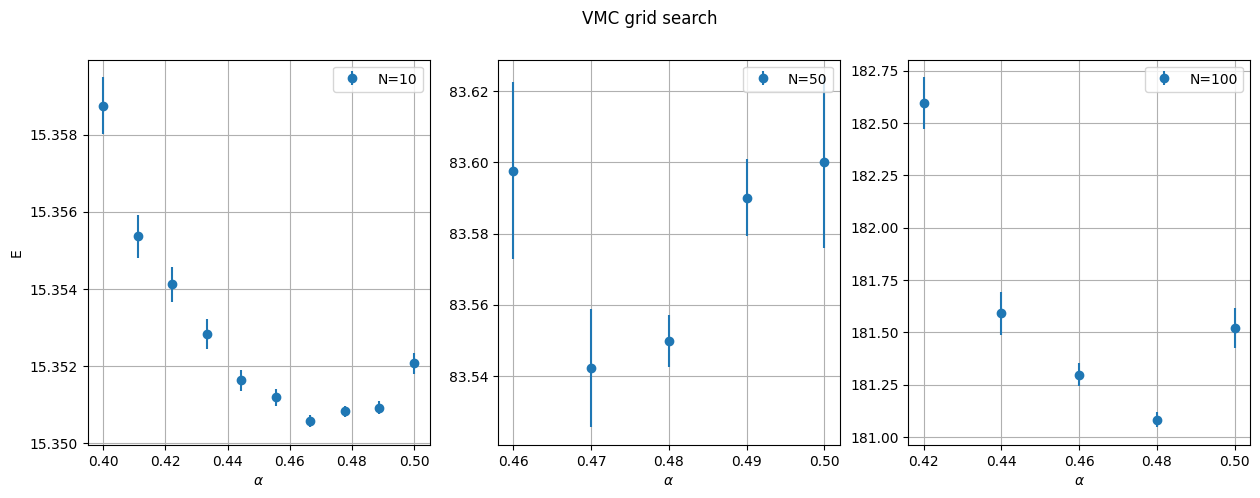

In [65]:
# present the grid search results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.errorbar(params_N10, energies_N10, yerr=energies_std_N10, fmt='o', label='N=10')
plt.xlabel(r'$\alpha$') 
plt.ylabel('E')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.errorbar(params_N50B, energies_N50B, yerr=energies_std_N50B, fmt='o', label='N=50')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.errorbar(params_N100, energies_N100, yerr=energies_std_N100, fmt='o', label='N=100')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()

# supertitle
plt.suptitle('VMC grid search')


## E/N as a function of N

In [35]:
Ns = np.array([10, 50, 100])
# for each N find the minimum energy and the std, save the params and get std_params as the spacing between the params
min_energies = np.array([np.min(energies_N10), np.min(energies_N50B), np.min(energies_N100)])
min_energies_std = np.array([energies_std_N10[np.argmin(energies_N10)], energies_std_N50B[np.argmin(energies_N50B)], energies_std_N100[np.argmin(energies_N100)]])
# add to std_energy the difference between the last energy and the minimum energy/np.sqert(12)
min_energies_vmc_std = np.array([np.min(energies_N10) - energies_N10[-1], np.min(energies_N50B) - energies_N50B[-1], np.min(energies_N100) - energies_N100[-1]])
# square su to min_energies_tot_std
min_energies_tot_std = np.sqrt(min_energies_std**2 + min_energies_vmc_std**2)
min_params = np.array([params_N10[np.argmin(energies_N10)], params_N50B[np.argmin(energies_N50B)], params_N100[np.argmin(energies_N100)]])
min_params_std = np.array([params_N10[1] - params_N10[0], params_N50B[1] - params_N50B[0], params_N100[1] - params_N100[0]])/np.sqrt(12)

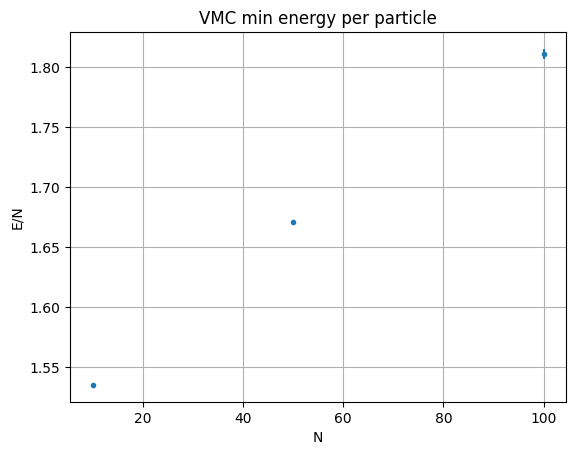

In [40]:
# errorbar of min_energies/N and std_energies/N
plt.figure()
plt.errorbar(Ns, min_energies/Ns, yerr=min_energies_tot_std/Ns, fmt='.')
plt.xlabel('N')
plt.ylabel('E/N')
plt.title('VMC min energy per particle')
plt.grid()

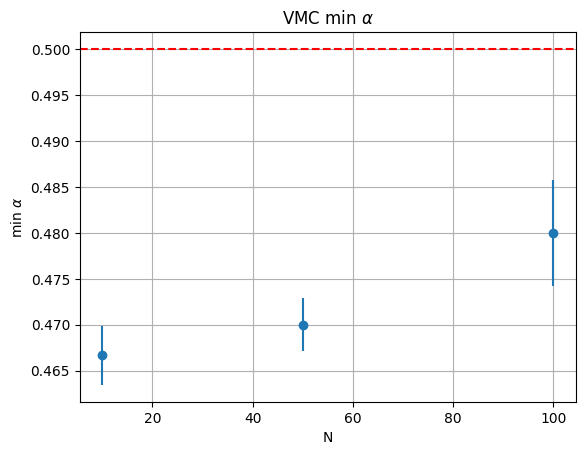

In [47]:
# eorrobar of alpha as a function of N
plt.errorbar(Ns, min_params, yerr=min_params_std, fmt='o', label='min alpha')
# plot an horizzonta line at 0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='exact')
plt.xlabel('N')
plt.ylabel(r'min $\alpha$')
plt.title(r'VMC min $\alpha$')
plt.grid()

In [99]:
x = np.linspace(-5, 5, 1000)
non_interactive_OB = np.exp(-x**2)/np.sqrt(np.pi)   
min_alpha = params_N100[np.argmin(energies_N100)]
interactive_min_alpha_OB = np.exp(-2*min_alpha*x**2)/(np.sqrt(1/(4*min_alpha))*np.sqrt(2*np.pi)) 

In [89]:
# import from run_chain from results 100
run_chain_100N = np.load('results/GridSearchN100/run_chain.npy')
run_steps = run_chain_100N.shape[0]
N = run_chain_100N.shape[1]
D = run_chain_100N.shape[2]

(array([1.35420709e-04, 1.69813270e-04, 4.72897713e-05, 6.81402614e-04,
        3.69720030e-04, 1.24673033e-03, 1.65514200e-03, 1.67663735e-03,
        2.96420885e-03, 4.15290174e-03, 3.75738728e-03, 5.34804323e-03,
        5.29645439e-03, 9.32468309e-03, 1.27187989e-02, 1.36559962e-02,
        1.81850666e-02, 2.41672227e-02, 2.97882569e-02, 3.64539651e-02,
        4.32550940e-02, 5.23089357e-02, 6.78414760e-02, 7.52036336e-02,
        8.40188769e-02, 8.92766396e-02, 1.11070776e-01, 1.24314061e-01,
        1.45381654e-01, 1.61425784e-01, 1.82781415e-01, 2.11090791e-01,
        2.21748186e-01, 2.48806534e-01, 2.76385068e-01, 2.96006024e-01,
        3.12101743e-01, 3.50056084e-01, 3.55406276e-01, 3.68453954e-01,
        3.91434633e-01, 4.20554385e-01, 4.20945600e-01, 4.47724508e-01,
        4.59319100e-01, 4.78503701e-01, 4.54009749e-01, 4.93535399e-01,
        4.95721476e-01, 5.06277843e-01, 5.06247750e-01, 4.98913536e-01,
        5.08085602e-01, 4.92871193e-01, 4.82007443e-01, 4.647380

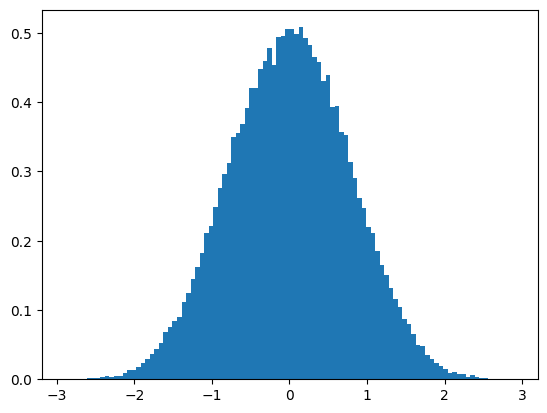

In [90]:
# estract a vector X_all.shape [runs_step*N, k] where k is the coordinate -> to [chain[:,0,k], chain[:,1,k] ... ] ch  for all particles in sequence
X_all = np.zeros((run_steps*N, D))
for i in range(N):
    X_all[i*run_steps:(i+1)*run_steps] = run_chain_100N[:,i,:]

# plot the histogram of the X_all[:,0]
plt.figure()
plt.hist(X_all[:,0], bins=100, density=True)

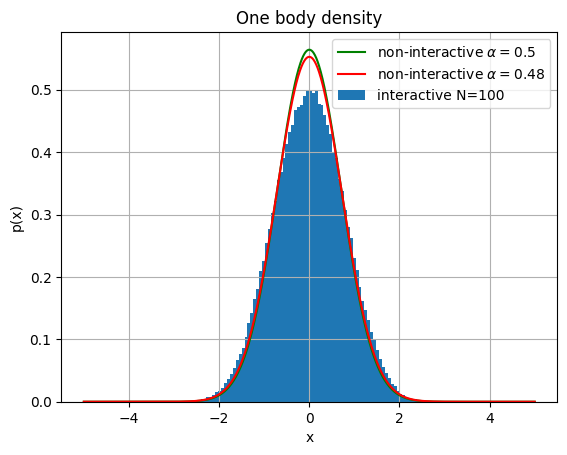

In [106]:
 # histo as a  sequence of [X_all[:,0], X_all[:,1], X_all[:,2]]

X_tot = np.zeros((run_steps*N*D))
for i in range(D):
    X_tot[i*run_steps*N:(i+1)*run_steps*N] = X_all[:,i]

plt.figure()
plt.hist(X_tot, bins=100, density=True, label='interactive N=100')
# plot the non interactive OB
plt.plot(x, non_interactive_OB, label=r'non-interactive $\alpha=0.5$', color='g')
plt.plot(x, interactive_min_alpha_OB, label=r'non-interactive $\alpha=0.48$', color='r')
plt.title('One body density')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid()

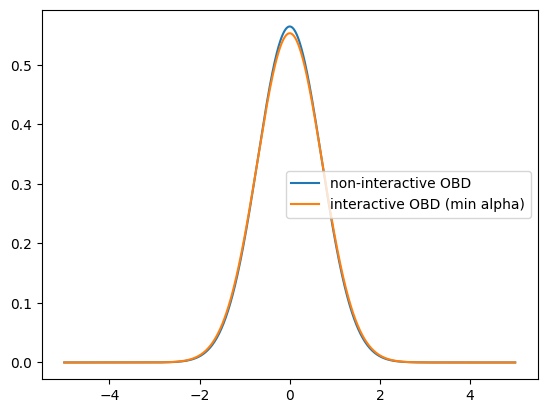

In [100]:
plt.figure()
plt.plot(x, non_interactive_OB, label='non-interactive OBD')
plt.plot(x, interactive_min_alpha_OB, label='interactive OBD (min alpha)')
plt.legend()